# Run a custom configuration and see results

In [1]:
import sys
sys.path.append('../')  # uncomment to add the path to the onlineSG folder 
# You have to change the path if you move this file.
# Alternatevely add the onlineSG folder to your PYTHONPATH
# e.g. On Linux add this line on .bashrc:
# export PYTHONPATH="<absolute-path-to-onlineSG>:PYTHONPATH"
# then you can use onlineSG library from everywhere

In [1]:
import source.game as game
import source.player as player
import source.environment as environment
import source.errors as errors
import source.parsers as parsers
import source.players.attackers as attackers
import source.players.base_defenders as base_defenders
import source.players.defenders as defenders
import source.runner as runner


import numpy as np
import pandas as pd
from importlib import *

In [51]:
def print_move(m):
    l1 = ""
    for i in range(len(g.values)):
        if m[0][0] == i:
            l1 += "□\t"
        else:
            l1 += " \t"
    l2 = "".join([str(i[0])+"\t" for i in g.values])
    l3 = ""
    for i in range(len(g.values)):
        if m[1][0] == i:
            l3 += "△\t"
        else:
            l3 += " \t"
    print(l1)
    print(l2)
    print(l3)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# if you change something in the files, don't forget to reload
reload(player)
reload(base_defenders)
reload(attackers)
reload(defenders)
reload(errors)
reload(runner)
reload(parsers)
reload(game)
reload(environment)

<module 'source.environment' from '/home/lorenzo/Scrivania/Polimi/Thesis/code/onlineSG/source/environment.py'>

In [3]:
values = ((1, 1), (2, 2), (3, 3))
time_horizon = 400
g = game.Game(values, time_horizon)
#agent = defenders.FABULOUS(g,0,1,0.55,0.35,0.1)
experts = [base_defenders.StackelbergDefender(g, 0),
           base_defenders.UnknownStochasticDefender(g, 0, algorithm='fpl')]
agent = base_defenders.MABDefender(g, 0, 1, 1, experts)
#agent = base_defenders.StackelbergDefender(g, 0)
#agent = base_defenders.UnknownStochasticDefender(g, 0)
#attacker = attackers.StackelbergAttacker(g, 1)
attacker = attackers.StochasticAttacker(g, 1, 1,0.55,0.35,0.1)
g.set_players([agent], [attacker])

In [1360]:
e = runner.Experiment(g, seed=732252)

In [1287]:
e.run_interaction()
print(e.agent.t, "\n",
      #len(e.game.history), "\n",
      "p["+ e.agent.experts[0].__class__.name +"] = ",e.agent.prob[e.agent.experts[0]],"\n",
      "p["+ e.agent.experts[1].__class__.name +"] = ",e.agent.prob[e.agent.experts[1]],"\n",
      "last moves: ",e.game.history[-1], "\n",
      "last strategies: ",e.game.strategy_history[-1], "\n",
      "unk last strategy: ",e.agent.experts[1].last_strategy, "\n",)
print_move(e.game.history[-1])
#print("state", e.agent.state)
print("unk avg_rewards: ",e.agent.experts[1].avg_rewards, "\n",
      "avg_r["+ e.agent.experts[0].__class__.name +"] = ",e.agent.avg_rewards[e.agent.experts[0]],"\n",
      "avg_r["+ e.agent.experts[1].__class__.name +"] = ",e.agent.avg_rewards[e.agent.experts[1]],"\n",
      "w["+ e.agent.experts[0].__class__.name +"] = ",e.agent.weight[e.agent.experts[0]],"\n",
      "w["+ e.agent.experts[1].__class__.name +"] = ",e.agent.weight[e.agent.experts[1]],"\n",)

482 
 p[stackelberg_defender] =  0.5 
 p[unknown_stochastic_defender] =  0.5 
 last moves:  {0: [1], 1: [0]} 
 last strategies:  {0: [0.0, 0.4, 0.6], 1: (0.55, 0.35, 0.1)} 
 unk last strategy:  [0, 1, 0] 

 	□	 	
1	2	3	
△	 	 	
unk avg_rewards:  {0: -0.9173228346456693, 1: -0.8858267716535433, 2: -1.2125984251968505} 
 avg_r[stackelberg_defender] =  -1.048458149779736 
 avg_r[unknown_stochastic_defender] =  -0.9294117647058824 
 w[stackelberg_defender] =  227 
 w[unknown_stochastic_defender] =  255 



In [1361]:
e.run()

In [1362]:
e.stats

{'best_action': 1, 'total_rewards': -4230, 'weak_regret': 760}

In [1363]:
e.agent.avg_rewards

{<StackelbergDefender id:0 resources:1>: -10.489510489510497,
 <UnknownStochasticDefender id:0 resources:1>: -10.789473684210526}

In [1329]:
not_sta = [f['total'] for i,f in enumerate(e.agent.feedbacks) if e.game.strategy_history[i][0]!=[0.0, 0.4, 0.6]]
sum(not_sta) / len(not_sta)

-8.926701570680628

In [4]:
rm -rf ./detect_with_expert

In [5]:
c = runner.Configuration(g, "detect_with_expert")

In [6]:
for i in range(100):
    c.run_an_experiment()
    if not i % 10:
        print(i)

0
10
20
30
40
50
60
70
80
90


In [7]:
c.stats

{'avg_total_rewards': -371.15, 'avg_weak_regret': 29.82}

In [1371]:
i=0

In [1383]:
i+=1
c.results_of(i,-10,None)

,defender-0,stochastic_attacker-1,feedback target 0,feedback target 1,feedback target 2,total
390,"([0.0, 0.4, 0.6], [2])","([0.55, 0.35, 0.1], [0])",-1,0,0,-1
391,"([0, 1, 0], [1])","([0.55, 0.35, 0.1], [0])",-1,0,0,-1
392,"([0.0, 0.4, 0.6], [2])","([0.55, 0.35, 0.1], [0])",-1,0,0,-1
393,"([0, 1, 0], [1])","([0.55, 0.35, 0.1], [0])",-1,0,0,-1
394,"([0.0, 0.4, 0.6], [2])","([0.55, 0.35, 0.1], [0])",-1,0,0,-1
395,"([0, 1, 0], [1])","([0.55, 0.35, 0.1], [1])",0,0,0,0
396,"([0, 1, 0], [1])","([0.55, 0.35, 0.1], [1])",0,0,0,0
397,"([0, 1, 0], [1])","([0.55, 0.35, 0.1], [0])",-1,0,0,-1
398,"([0.0, 0.4, 0.6], [1])","([0.55, 0.35, 0.1], [0])",-1,0,0,-1
399,"([0, 1, 0], [1])","([0.55, 0.35, 0.1], [2])",0,0,-3,-3


In [8]:
last_100 = [sum([f['total'] for f in e.agent.feedbacks][-100:])/100 for e in c.experiments]
sum(last_100) / len(last_100)

-0.8899000000000002

In [9]:
c.experiments[41].agent.avg_rewards

{<UnknownStochasticDefender id:0 resources:1>: -0.9178885630498533,
 <StackelbergDefender id:0 resources:1>: -1.2372881355932202}

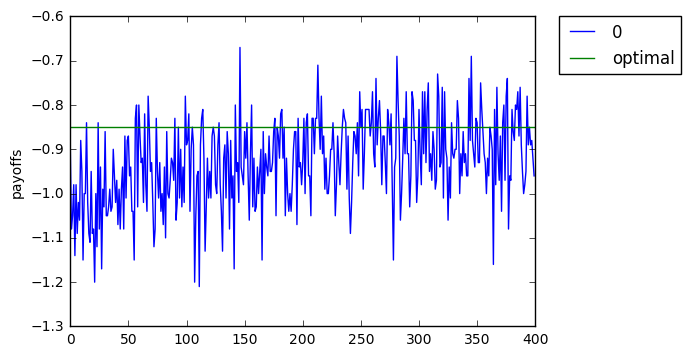

In [13]:
comp = [c]
for i,c in enumerate(comp):
    payoffs = [np.array([f['total'] for f in e.agent.feedbacks]) for e in c.experiments]
    avg_payoffs = sum(payoffs, np.zeros(len(payoffs[0]))) / len(payoffs)
    plt.plot(avg_payoffs, label = str(i))
plt.plot([-0.85 for i in range(time_horizon)], label="optimal")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('payoffs')
plt.show()